In [1]:
from utils import commun_functions, data, diagram, GurobiSolver 
from RecuitSimule import RS
from VariableNeighborhoodSearch import VNS
#from GurobiSolver import GurSol
import random
import math
import matplotlib.pyplot as plt
from PIL import Image
import time 



In [2]:
import itertools
for id,a in enumerate(itertools.combinations(range(5), 2)):print(a)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [5]:
instancefilename='Instances/Kacem2.fjs'
InstanceAuthorName='Kacem'
instancename='Kacem2'
resfilename="Results/%s.csv" % instancename
resfich = open(resfilename, "a")
resfich.write("n;mu;lambda;pmtime; cmax")

ProcTime=commun_functions.FJSInstanceReading(instancefilename)
data_instance = data.data(0.0, 0.0, 0, ProcTime)
for j,job in enumerate(ProcTime): print("J%d (%d operations):" % (j,len(job)),job)

kmax=min([5, sum([1  for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) if len(op)>1])])
#UBcmax=sum([ ])
NMachines=max([om[0]  for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) for omid,om in enumerate(op)])+1

#for m in range(NMachines):
#    resfich.write("; Nbr%d" % m)
#resfich.write("\n")
MUs=[0.0]#,0.1]
EHFs=[0.7]#,0.9,0.99]
PMTIMEs=[2]#,5]
N=len(MUs)*len(EHFs)*len(PMTIMEs)
n=0
nbrestart=10
maxtime=60
showplots=True
for mu in MUs:
    data_instance.mu=mu
    for EHFmax in EHFs:
        data_instance.lambdaPM=EHFmax
        for pmtime in PMTIMEs: 
            data_instance.PM_time=pmtime
            VNS_Algo = VNS(kmax, maxtime, data_instance)
            c0=float("inf")
            best_energy=c0
            for k in range(nbrestart):
                """"
                RS_initial_solution = commun_functions.GenererSolution(data_instance)
                RS_instance = RS(RS_initial_solution, 50, 0.1, 0.1, 10, 100)
                best_sub_solution, best_sub_energy, nb_sub_iteration = RS_instance.simulated_annealing(data_instance)
                if best_sub_energy < best_energy : 
                    best_solution = best_sub_solution
                    best_energy = best_sub_energy
                    nb_iteration = nb_sub_iteration
                    """
                a,b,c,d,e,f,solVNS = VNS_Algo.BasicVNS()
                if c<c0:
                    a0,b0,c0,d0,e0,f0,bestsolVNS = a,b,c,d,e,f,solVNS
            #print('bestVNS=',c0,' BestRS=',best_energy)
            plotfilename= "results/Figs/%s/%s"  % (InstanceAuthorName,instancename)
            GanttVNS = diagram.diagram(a0,b0,pmtime,EHFmax,mu,c0,d0,e0,f0, plotfilename,1,1)
            GanttVNS.plotGantt()
            GanttVNS.plotEHF2()
            
            #pngfilename='results/Figs/%s/%s_%d.png' % (InstanceAuthorName,instancename,n)
            #GanttVNS = diagram.diagram(a0,b0,pmtime,mu,c0,d0,e0,f0,pngfilename,1,1)
            #GanttVNS.plotGantt()
            #GanttVNS.plotEHF2()
            """ nbrmaint=[len(mtasks) for mi,mtasks in enumerate(e0)]
            resfich.write("%d ;%d ; %d ; %d ; %d" % (n,mu,EHFmax,pmtime,c0))
            for m in range(len(nbrmaint)):
                resfich.write("; %d" % nbrmaint[m])
            resfich.write("\n")
            print(f"Best solution = {bestsolVNS}")
            if showplots:
                # Charger les images enregistrées
                image_gantt = Image.open(GanttVNS.ganttsavefilename)
                image_ehf = Image.open(GanttVNS.ehfplotsavefilename)
                # Afficher les deux images dans une seule fenêtre
                fig, ax = plt.subplots(1, 2, figsize=(20, 10))
                ax[0].imshow(image_gantt)
                ax[0].axis('off')
                ax[0].set_title('Gantt Chart')
                ax[1].imshow(image_ehf)
                ax[1].axis('off')
                ax[1].set_title('EHF Chart')
                plt.show()"""
resfich.close()

J0 (3 operations): [[(0, 1), (1, 4), (2, 6), (3, 9), (4, 3), (5, 5), (6, 2)], [(0, 8), (1, 9), (2, 5), (3, 4), (4, 1), (5, 1), (6, 3)], [(0, 4), (1, 8), (2, 10), (3, 4), (4, 11), (5, 4), (6, 3)]]
J1 (2 operations): [[(0, 6), (1, 9), (2, 8), (3, 6), (4, 5), (5, 10), (6, 3)], [(0, 2), (1, 10), (2, 4), (3, 5), (4, 9), (5, 8), (6, 4)]]
J2 (3 operations): [[(0, 15), (1, 4), (2, 8), (3, 4), (4, 8), (5, 7), (6, 1)], [(0, 9), (1, 6), (2, 1), (3, 10), (4, 7), (5, 1), (6, 6)], [(0, 11), (1, 2), (2, 7), (3, 5), (4, 2), (5, 3), (6, 14)]]
J3 (3 operations): [[(0, 2), (1, 8), (2, 5), (3, 8), (4, 9), (5, 4), (6, 3)], [(0, 5), (1, 3), (2, 8), (3, 1), (4, 9), (5, 3), (6, 6)], [(0, 1), (1, 2), (2, 6), (3, 4), (4, 1), (5, 7), (6, 2)]]
J4 (3 operations): [[(0, 7), (1, 1), (2, 8), (3, 5), (4, 4), (5, 3), (6, 9)], [(0, 2), (1, 4), (2, 5), (3, 10), (4, 6), (5, 4), (6, 9)], [(0, 5), (1, 1), (2, 7), (3, 1), (4, 6), (5, 6), (6, 2)]]
J5 (3 operations): [[(0, 8), (1, 7), (2, 4), (3, 56), (4, 9), (5, 8), (6, 4)], 

[(4, 2), (2, 0), (2, 1), (5, 6), (0, 0), (7, 4), (6, 2), (3, 1), (4, 0), (5, 4), (0, 3), (8, 0), (5, 4), (8, 2), (7, 6), (3, 0), (8, 3), (4, 6), (7, 0), (9, 0), (3, 2), (6, 5), (9, 2), (2, 5), (0, 1), (9, 6), (6, 3), (1, 6), (1, 2)]
88
[[(0, 1), (1, 4), (2, 6), (3, 9), (4, 3), (5, 5), (6, 2)], [(0, 8), (1, 9), (2, 5), (3, 4), (4, 1), (5, 1), (6, 3)], [(0, 4), (1, 8), (2, 10), (3, 4), (4, 11), (5, 4), (6, 3)]]
[[(0, 6), (1, 9), (2, 8), (3, 6), (4, 5), (5, 10), (6, 3)], [(0, 2), (1, 10), (2, 4), (3, 5), (4, 9), (5, 8), (6, 4)]]
[[(0, 15), (1, 4), (2, 8), (3, 4), (4, 8), (5, 7), (6, 1)], [(0, 9), (1, 6), (2, 1), (3, 10), (4, 7), (5, 1), (6, 6)], [(0, 11), (1, 2), (2, 7), (3, 5), (4, 2), (5, 3), (6, 14)]]
[[(0, 2), (1, 8), (2, 5), (3, 8), (4, 9), (5, 4), (6, 3)], [(0, 5), (1, 3), (2, 8), (3, 1), (4, 9), (5, 3), (6, 6)], [(0, 1), (1, 2), (2, 6), (3, 4), (4, 1), (5, 7), (6, 2)]]
[[(0, 7), (1, 1), (2, 8), (3, 5), (4, 4), (5, 3), (6, 9)], [(0, 2), (1, 4), (2, 5), (3, 10), (4, 6), (5, 4), (6, 9

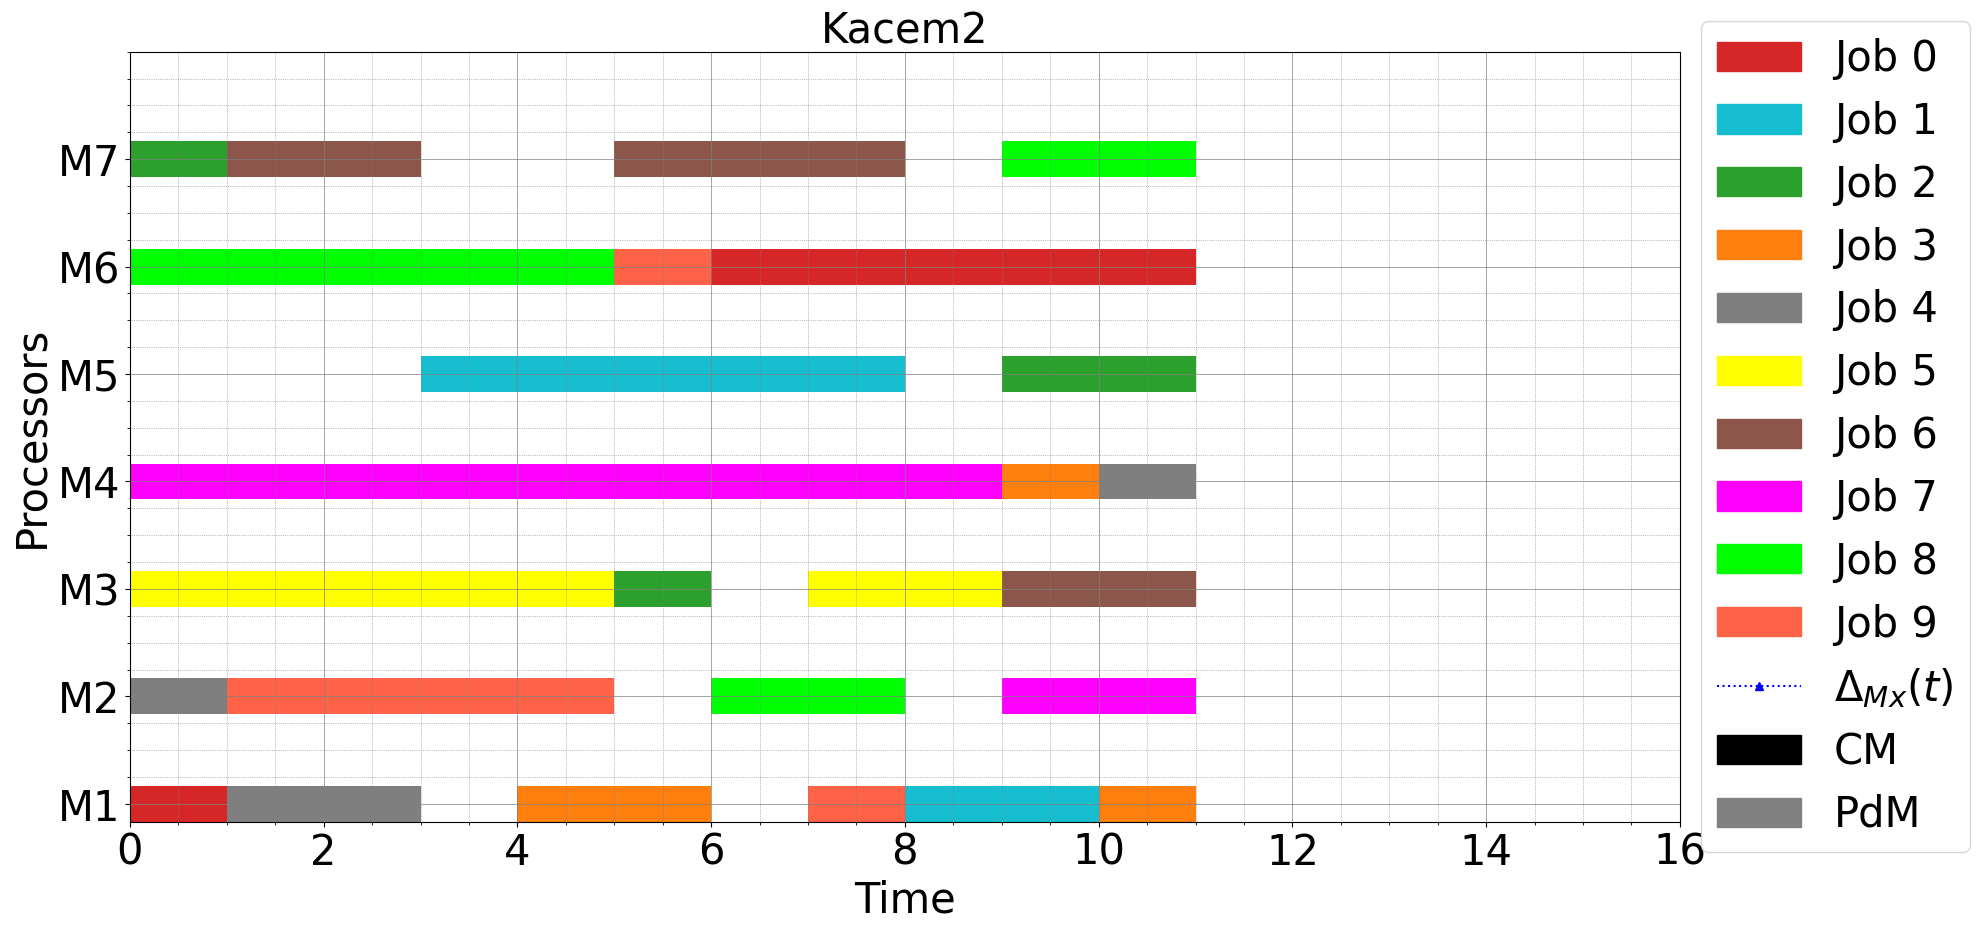

In [3]:
from utils import commun_functions, data, diagram, GurobiSolver 
from RecuitSimule import RS
from VariableNeighborhoodSearch import VNS
#from GurobiSolver import GurSol
import random
import math
import matplotlib.pyplot as plt
from PIL import Image
import time 
import matplotlib
instancename="Kacem2"
instancefilename='Instances/Kacem2.fjs'
ProcTime=commun_functions.FJSInstanceReading(instancefilename)
data_instance = data.data(0.0, 0.0, 0, ProcTime)
data_instance.mu=0.0
data_instance.lambdaPM=0.8
data_instance.lambdaC=0.99
data_instance.PM_time=2
data_instance.CM_time=data_instance.PM_time
RandomSol=[(jid,mo[0]) for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) for mo in random.sample(op,1)]
RandomSol=random.sample(RandomSol,len(RandomSol)) #shaking
print(RandomSol)
#for jid,job in enumerate(ProcTime): print(job)
NM,NJ,UBcmax,schedule,maint,ehf=commun_functions.evaluate(RandomSol,data_instance)
PMT=data_instance.PM_time
print(UBcmax)
NJ=len(ProcTime)
NM=max([om[0] for _,job in enumerate(ProcTime) for _,op in enumerate(job) for _,om in enumerate(op)])+1
NOP=[len(job) for _,job in enumerate(ProcTime)]
for _,job in enumerate(ProcTime): print(job)
OPTSOL=GurobiSolver.GurSol(data_instance.mu, data_instance.lambdaPM, data_instance.lambdaQ, data_instance.lambdaC, data_instance.PM_time, data_instance.CM_time, ProcTime)
X, Y, ZZ, DELTA, objf, gap, cputime, start_time, task_duration, assigned_machine=OPTSOL.SolveIPQM_FJSP(instancename,UBcmax,0,0,True)

if objf != 'infeas': OPTSOL.plotGANTT0(NJ,NM,NOP,X, Y, ZZ, DELTA, objf, gap, cputime, start_time, task_duration, assigned_machine,instancename)


In [6]:
print(assigned_machine[0,0])

1


cmax= 66.0  gap= 0.0  cputime= 1.65625
2
[[], []]
[(0, 25), (1, 37)]   0   2.0   1
[(0, 32), (1, 24)]   1   41.0   1
[(0, 45), (1, 65)]   0   0.0   0
[(0, 21), (1, 65)]   1   45.0   0
{(0, 0): 2.0, (0, 1): 41.0, (1, 0): 0.0, (1, 1): 45.0}
[]
[]


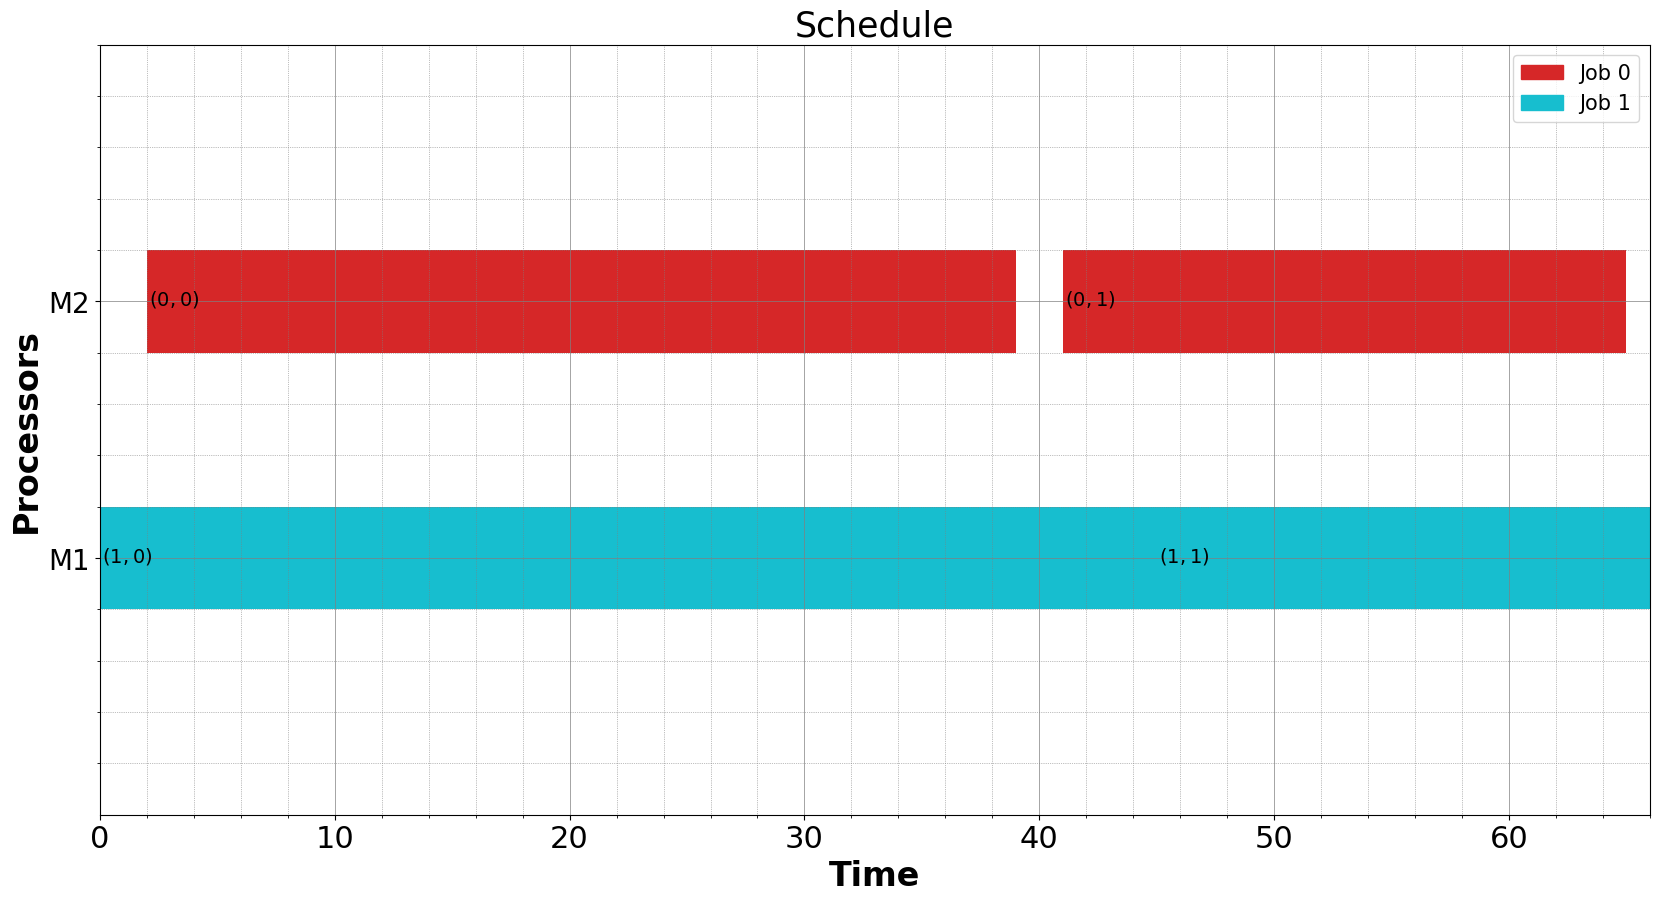

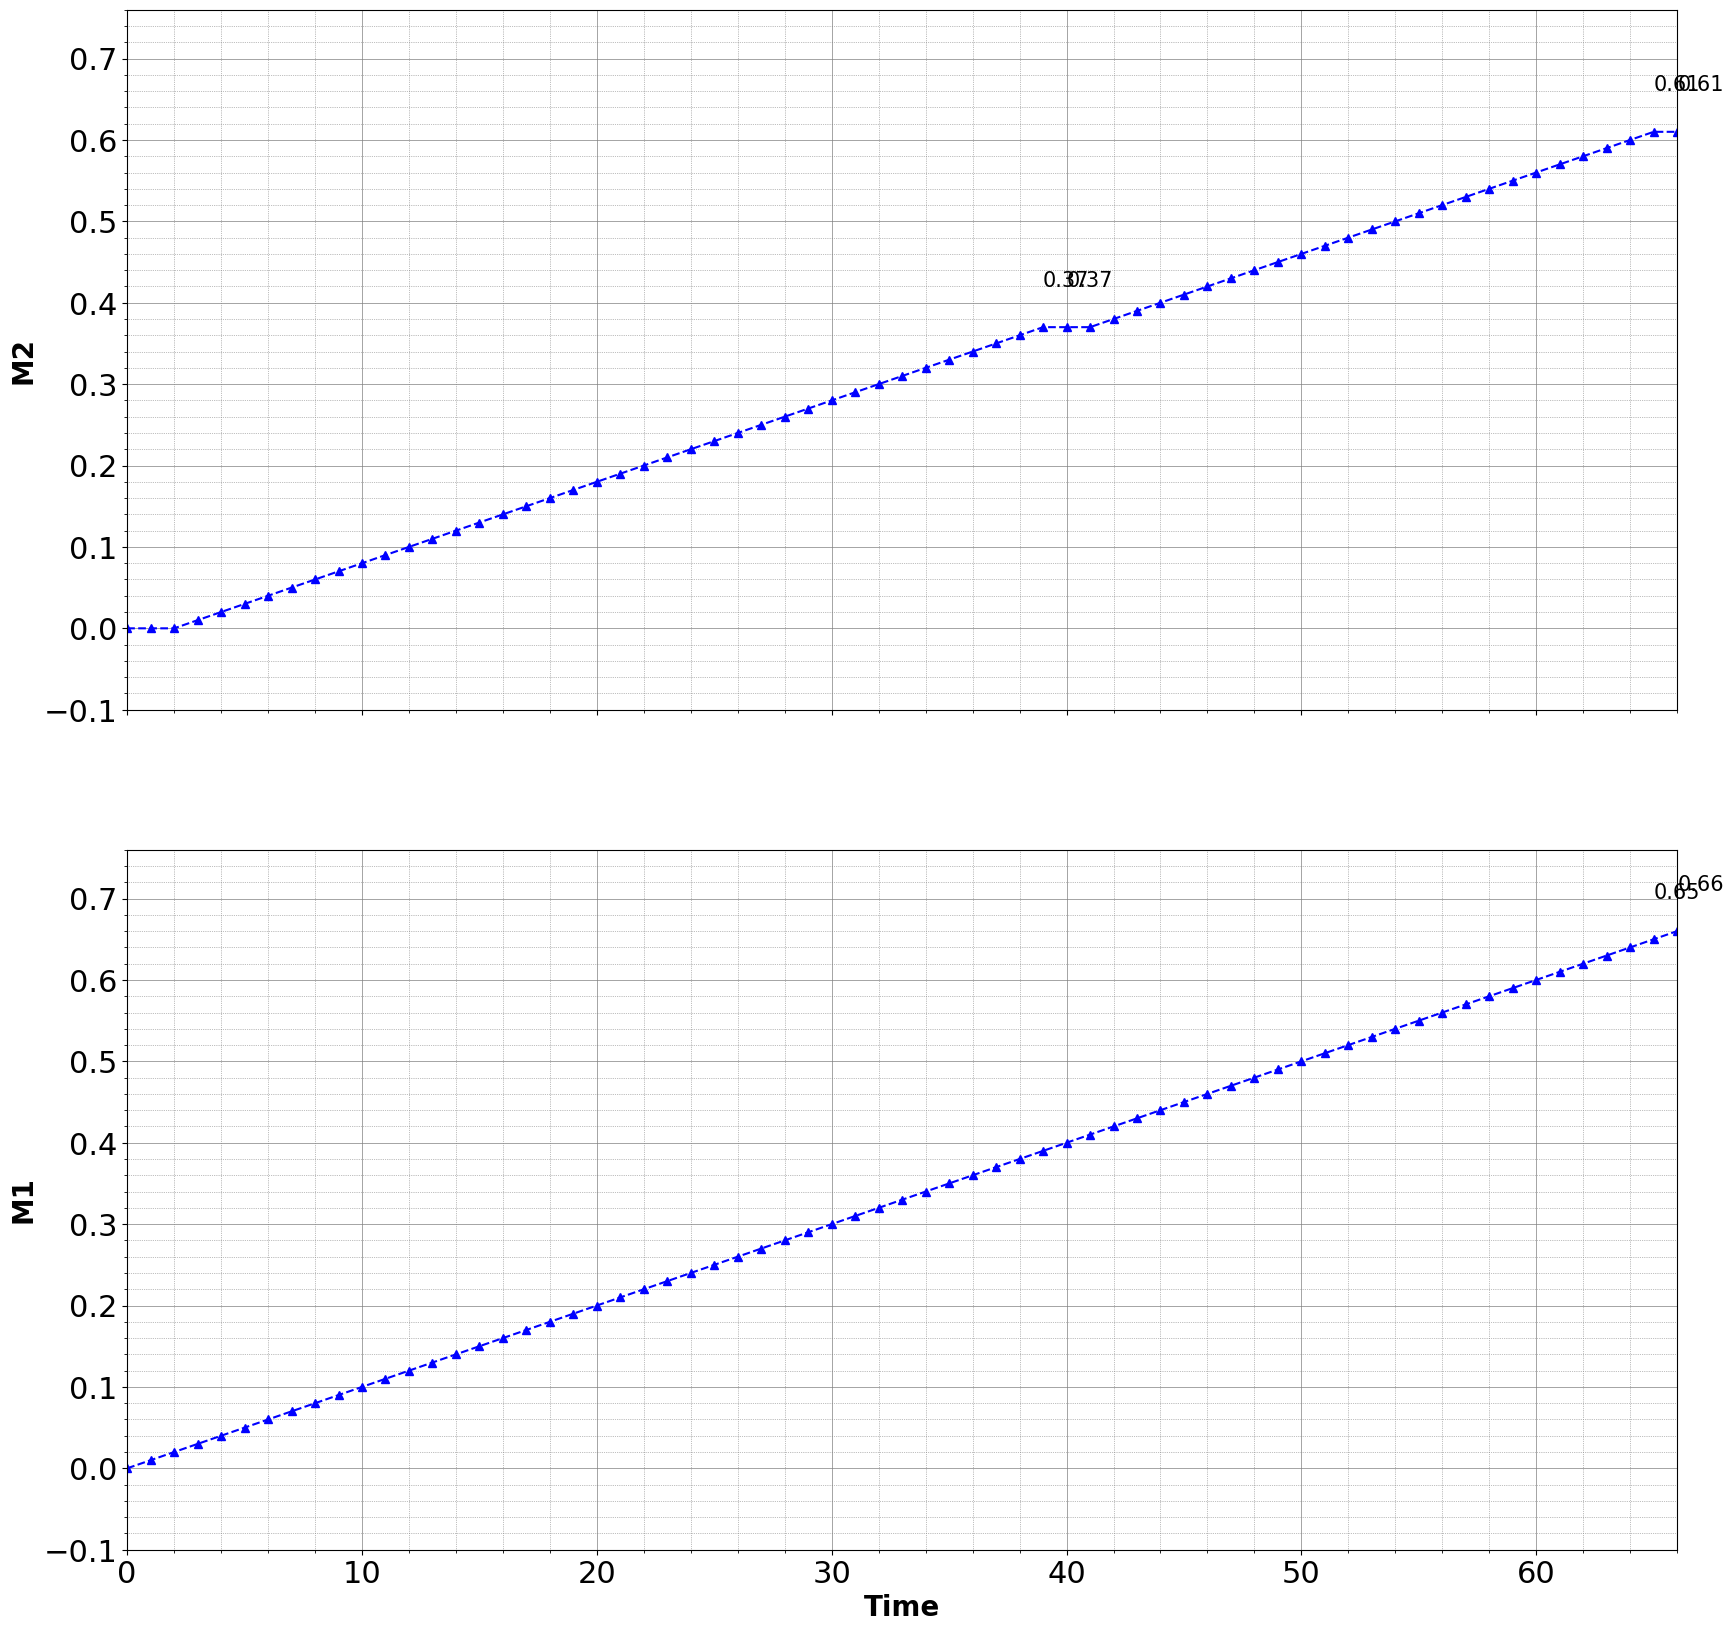

In [12]:
print("cmax=",objf," gap=", gap," cputime=", cputime)
Optsol=[]
OptSchedule=[]
print(NM)
for m in range(NM):
    OptSchedule.append([],)
print(OptSchedule)
for j,job in enumerate(ProcTime): 
    for i,oper in enumerate(job):
        print(oper, " " , i, " " ,start_time[j,i], " ", assigned_machine[j,i])
        Optsol.append((j,assigned_machine[j,i]))
        for mid,om in enumerate(oper):
            if assigned_machine[j,i]==om[0]:
                OptSchedule[om[0]].append((j,i,int(start_time[j,i]),int(start_time[j,i])+om[1]))
print(start_time)
a,b,c,d,e,f=commun_functions.evaluate(Optsol,data_instance)
GanttOPT = diagram.diagram(a,b,data_instance.PM_time,data_instance.mu,int(objf),OptSchedule,e,f,"OptSol_Kacem1",1,1)
GanttOPT.plotGantt()
EHF=GanttOPT.plotEHF2()


In [8]:
for j,job in enumerate(ProcTime): print(job)
print("ehf=",f)
for mid,m in enumerate(DELTA):
    print(m)

[[(0, 1), (1, 4), (2, 6), (3, 9), (4, 3), (5, 5), (6, 2)], [(0, 8), (1, 9), (2, 5), (3, 4), (4, 1), (5, 1), (6, 3)], [(0, 4), (1, 8), (2, 10), (3, 4), (4, 11), (5, 4), (6, 3)]]
[[(0, 6), (1, 9), (2, 8), (3, 6), (4, 5), (5, 10), (6, 3)], [(0, 2), (1, 10), (2, 4), (3, 5), (4, 9), (5, 8), (6, 4)]]
[[(0, 15), (1, 4), (2, 8), (3, 4), (4, 8), (5, 7), (6, 1)], [(0, 9), (1, 6), (2, 1), (3, 10), (4, 7), (5, 1), (6, 6)], [(0, 11), (1, 2), (2, 7), (3, 5), (4, 2), (5, 3), (6, 14)]]
[[(0, 2), (1, 8), (2, 5), (3, 8), (4, 9), (5, 4), (6, 3)], [(0, 5), (1, 3), (2, 8), (3, 1), (4, 9), (5, 3), (6, 6)], [(0, 1), (1, 2), (2, 6), (3, 4), (4, 1), (5, 7), (6, 2)]]
[[(0, 7), (1, 1), (2, 8), (3, 5), (4, 4), (5, 3), (6, 9)], [(0, 2), (1, 4), (2, 5), (3, 10), (4, 6), (5, 4), (6, 9)], [(0, 5), (1, 1), (2, 7), (3, 1), (4, 6), (5, 6), (6, 2)]]
[[(0, 8), (1, 7), (2, 4), (3, 56), (4, 9), (5, 8), (6, 4)], [(0, 5), (1, 14), (2, 1), (3, 9), (4, 6), (5, 5), (6, 8)], [(0, 3), (1, 5), (2, 2), (3, 5), (4, 4), (5, 5), (6, 7)

# Recuit Simulé 

In [5]:
initial_solution = commun_functions.GenererSolution(data_instance)
RS_instance = RS(initial_solution, 50, 0.1, 0.1, 100, 100)
best_solution, best_energy, nb_iteration = RS_instance.simulated_annealing(data_instance)

iterations = 100
x = [i for i in range(iterations)]

solutions = []
for i in range(iterations): 
    initial_solution = commun_functions.GenererSolution(data_instance)
    RS_instance = RS(initial_solution, 50, 0.1, 0.1, 10, 100)

    best_sub_solution, best_sub_energy, nb_sub_iteration = RS_instance.simulated_annealing(data_instance)
    
    solutions.append(best_energy)

    if best_sub_energy < best_energy : 
        best_solution = best_sub_solution
        best_energy = best_sub_energy
        nb_iteration = nb_sub_iteration


print("intial Solution:", initial_solution)
print("Best Solution:", best_solution, "Best energy:", best_energy)
print("Number of iterations:", nb_iteration)
print("Solutions ", solutions)

Initial solution:  [(0, 1), (3, 2), (0, 0), (2, 4), (3, 0), (2, 0), (2, 0), (1, 0), (1, 3), (0, 1), (1, 0), (2, 3)]
Initial solution:  [(3, 0), (2, 2), (1, 2), (0, 3), (1, 0), (3, 4), (1, 4), (2, 1), (2, 3), (0, 0), (2, 4), (0, 4)]
Initial solution:  [(1, 1), (0, 3), (0, 3), (1, 4), (2, 2), (0, 1), (2, 4), (1, 0), (2, 0), (3, 3), (2, 3), (3, 1)]
Initial solution:  [(2, 4), (0, 2), (2, 0), (1, 4), (1, 0), (0, 0), (1, 0), (2, 0), (3, 3), (3, 1), (2, 0), (0, 4)]
Initial solution:  [(1, 0), (1, 3), (0, 2), (3, 1), (2, 0), (2, 2), (2, 3), (0, 3), (0, 2), (3, 0), (1, 3), (2, 0)]
Initial solution:  [(0, 3), (1, 1), (2, 2), (3, 2), (2, 1), (0, 0), (1, 0), (0, 2), (1, 4), (2, 3), (3, 4), (2, 3)]
Initial solution:  [(2, 1), (1, 4), (0, 4), (3, 4), (1, 2), (2, 3), (2, 2), (3, 3), (0, 3), (2, 2), (1, 4), (0, 3)]
Initial solution:  [(2, 0), (1, 3), (1, 3), (0, 1), (0, 2), (0, 1), (3, 2), (3, 2), (1, 3), (2, 1), (2, 0), (2, 2)]
Initial solution:  [(2, 3), (1, 0), (0, 4), (0, 3), (2, 1), (3, 2), (1, 